In [46]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [21]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
with open("C:/Users/admin/OneDrive/Documents/Amazon_Reviews.txt", "r", encoding="utf-8", errors='ignore') as file:
    reviews = file.readlines()

In [36]:
reviews = [r.strip() for r in reviews if r.strip() != ""]

In [41]:
results = []
for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    
    results.append({"Review": review, "Polarity": polarity, "Sentiment": sentiment})


In [42]:
df = pd.DataFrame(results)

In [43]:
print(df['Sentiment'].value_counts())

Sentiment
Positive    502008
Negative     58068
Neutral       8378
Name: count, dtype: int64


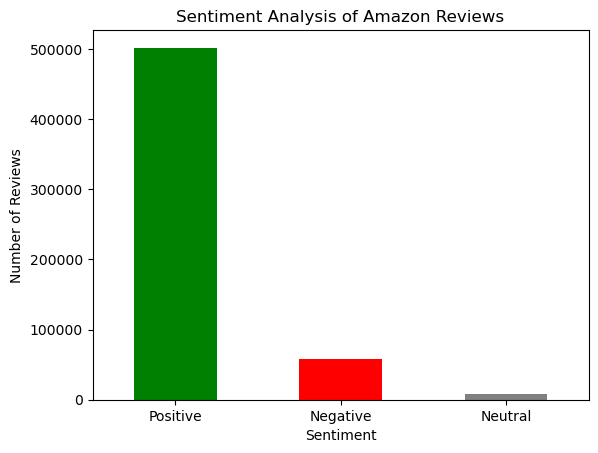

In [44]:
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Analysis of Amazon Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

In [45]:
df.to_csv("Amazon_Review_Sentiments.csv", index=False)